# ELAIS-N2 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn2

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_elais-n2_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_elais-n2_20171206.fits


## 0 - Quick checks

On the test square degree these showed megacam_y (From RCSLenS) to be empty. Perhaps we should remove it.

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

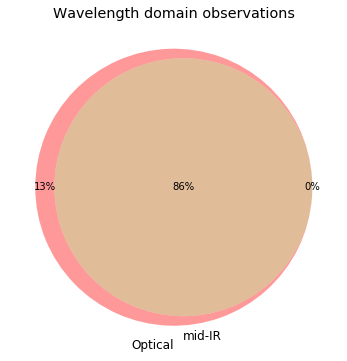

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 5)
    ],
    set_labels=('Optical', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

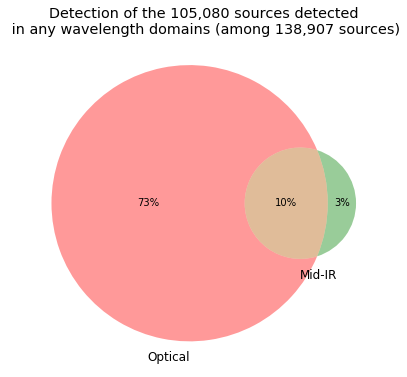

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 5] == 1),
        np.sum(flag_det[flag_obs == 5] == 4),
        np.sum(flag_det[flag_obs == 5] == 5)
    ],
    set_labels=('Optical', 'Mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["WFC u", "Megacam u"]
g_bands = ["WFC g", "Megacam g", "GPC1 g"]
r_bands = ["WFC r", "Megacam r", "GPC1 r"]
i_bands = ["WFC i", "Megacam i", "GPC1 i"]
z_bands = ["WFC z", "Megacam z", "GPC1 z"]
y_bands = [         "Megacam y", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

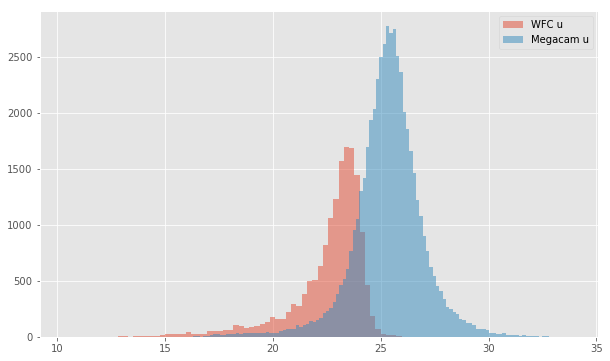

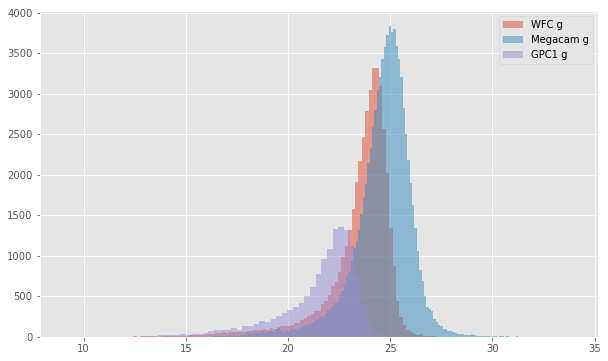

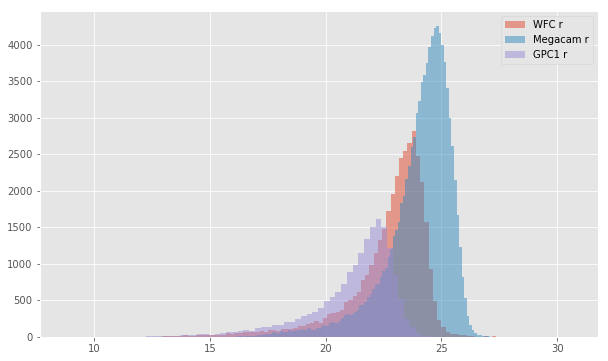

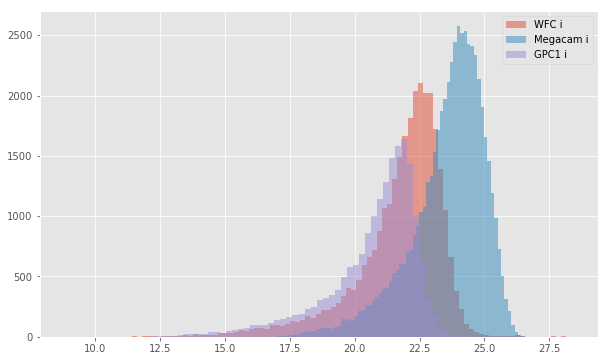

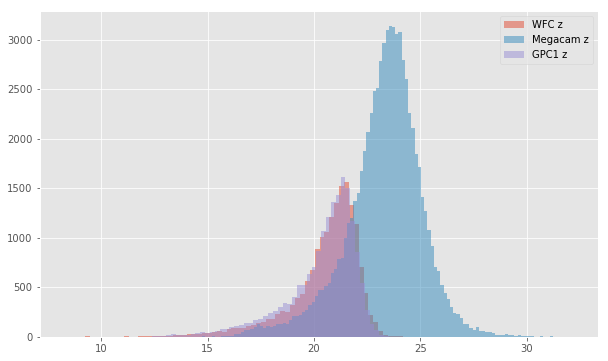

HELP warning: the column m_megacam_y (Megacam y) is empty.


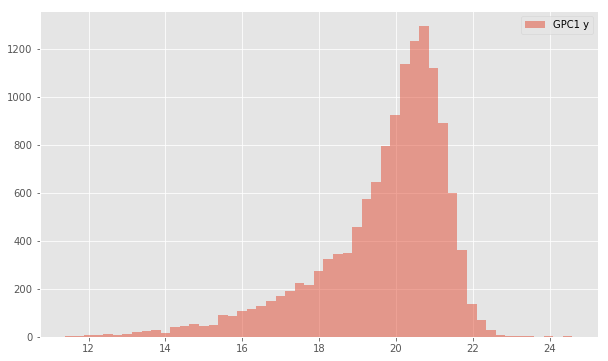

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Megacam u (aperture) - WFC u (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.27
- 1% percentile: -0.714999008178711
- 99% percentile: 3.7722917556762963


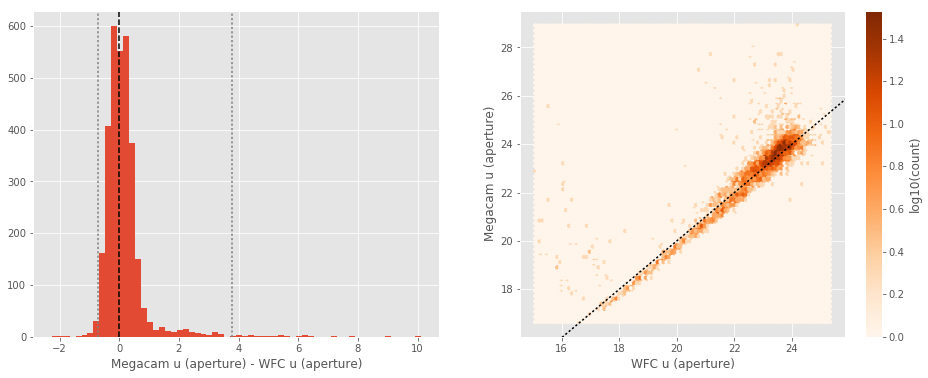

Megacam u (total) - WFC u (total):
- Median: -0.22
- Median Absolute Deviation: 0.22
- 1% percentile: -1.060940284729004
- 99% percentile: 3.1821101951599164


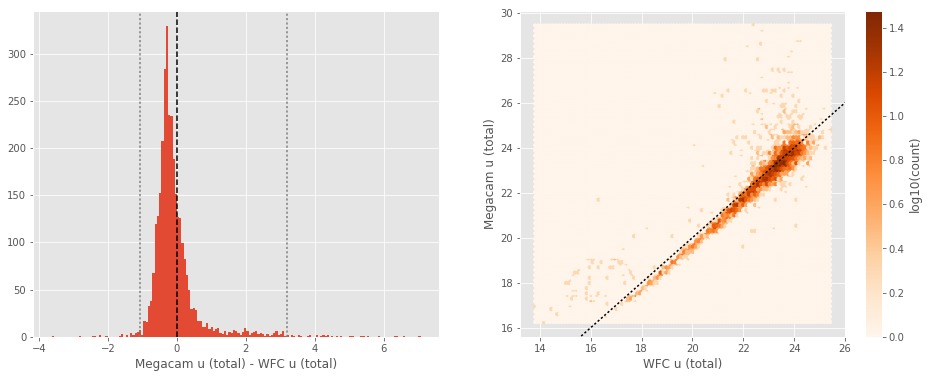

Megacam g (aperture) - WFC g (aperture):
- Median: -0.01
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7999117279052734
- 99% percentile: 1.1106660461425815


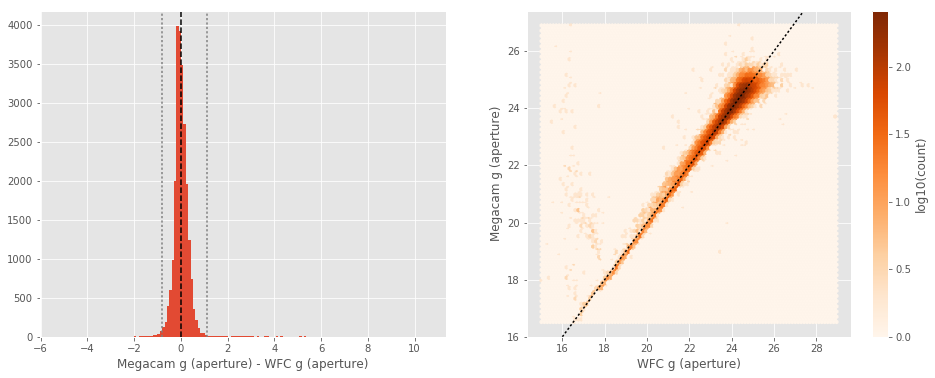

Megacam g (total) - WFC g (total):
- Median: -0.07
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1555734252929688
- 99% percentile: 1.6742794036865165


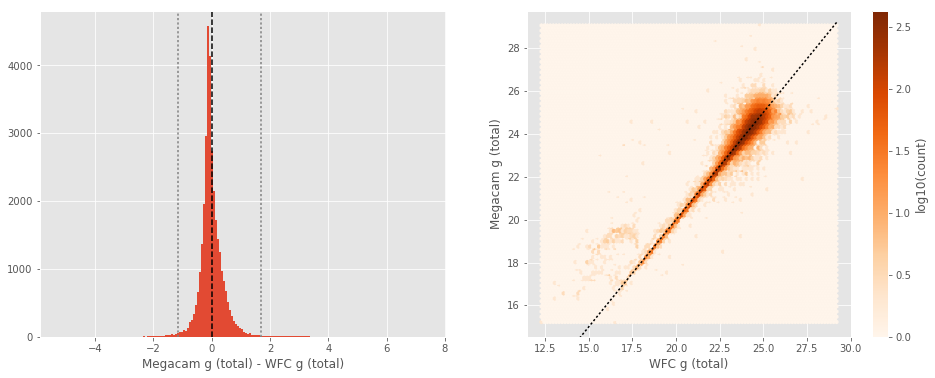

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.21
- 1% percentile: -1.4650848960876464
- 99% percentile: 2.351793956756592


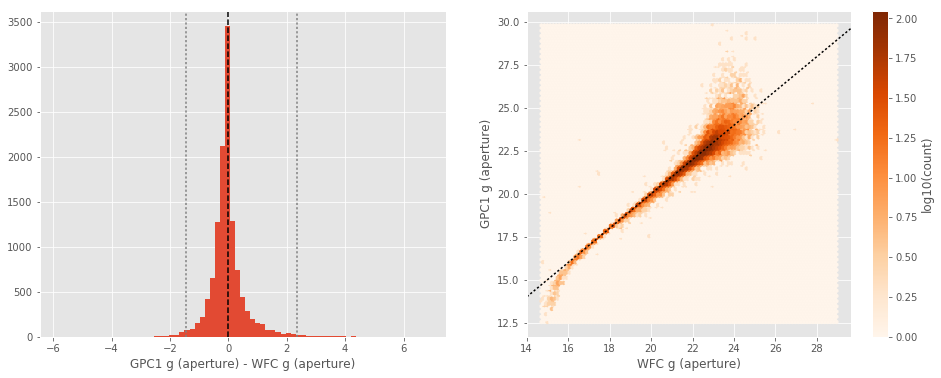

GPC1 g (total) - WFC g (total):
- Median: 0.01
- Median Absolute Deviation: 0.13
- 1% percentile: -1.276540241241455
- 99% percentile: 0.8664400100708022


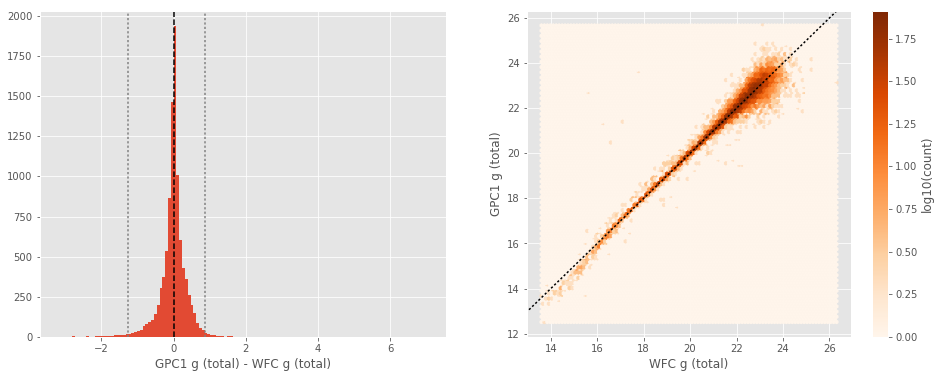

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.29
- 1% percentile: -3.72856201171875
- 99% percentile: 2.4124911499023414


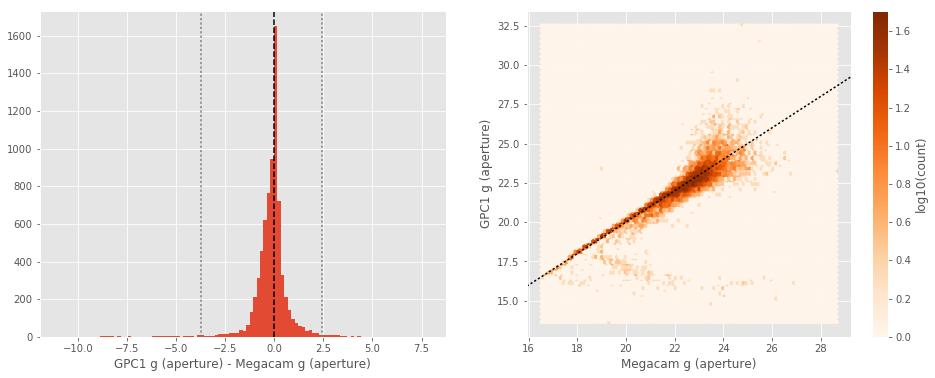

GPC1 g (total) - Megacam g (total):
- Median: 0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -3.1557310581207276
- 99% percentile: 0.9297513008117672


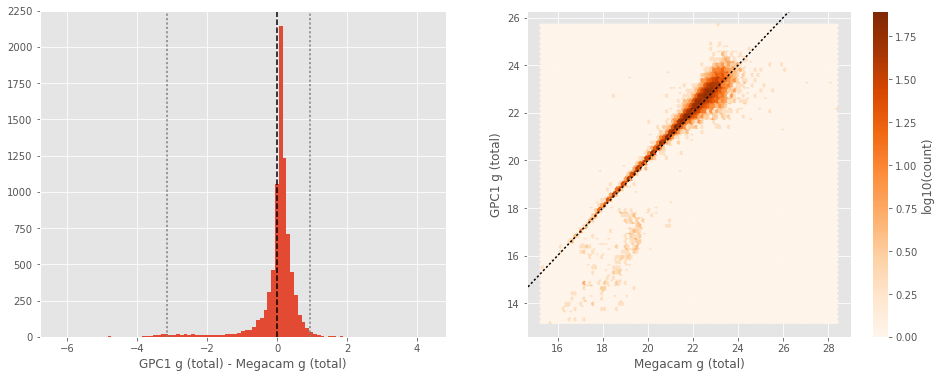

Megacam r (aperture) - WFC r (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7845287322998047
- 99% percentile: 1.7475967407226562


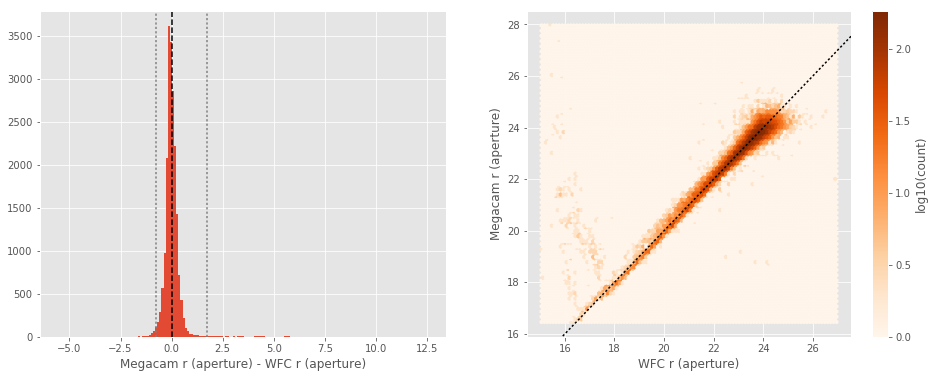

Megacam r (total) - WFC r (total):
- Median: -0.12
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2068518447875975
- 99% percentile: 1.9150489807128823


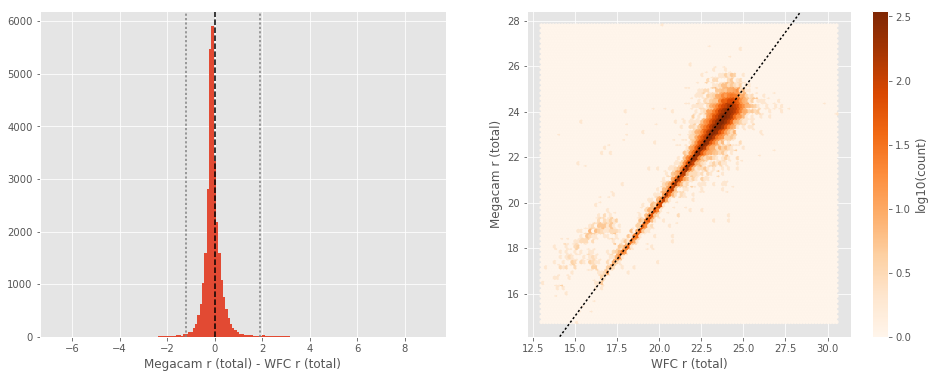

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.12
- 1% percentile: -1.060281753540039
- 99% percentile: 1.2858831405639648


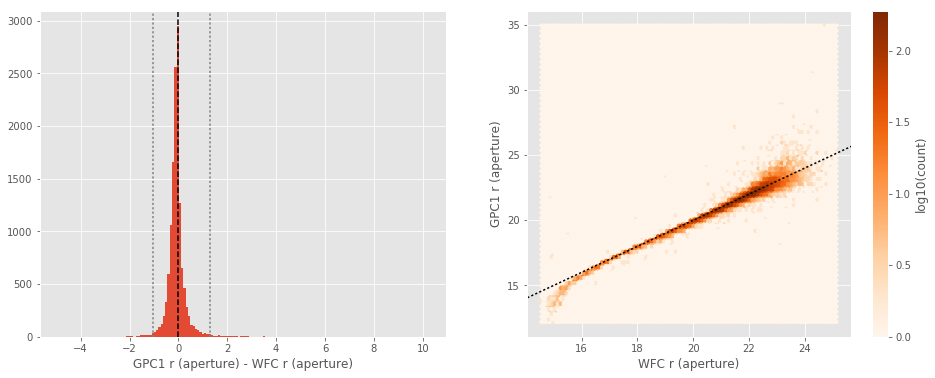

GPC1 r (total) - WFC r (total):
- Median: -0.00
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8407918167114257
- 99% percentile: 0.7846715545654296


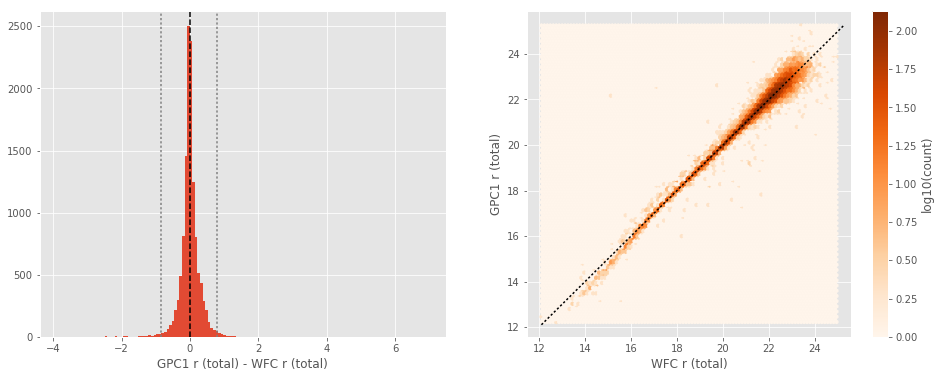

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -4.1356661415100096
- 99% percentile: 1.3487873077392583


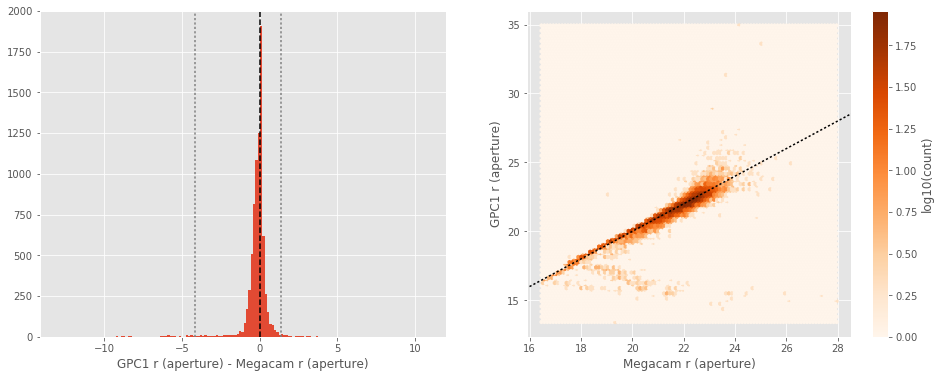

GPC1 r (total) - Megacam r (total):
- Median: 0.12
- Median Absolute Deviation: 0.10
- 1% percentile: -2.9029380989074705
- 99% percentile: 0.832116050720215


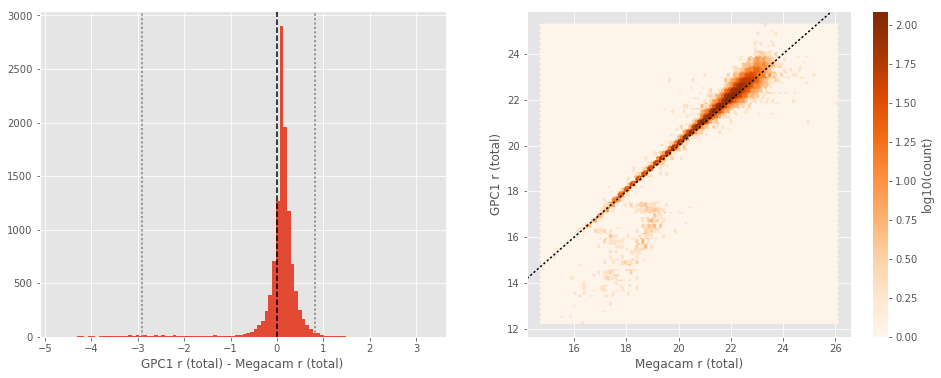

Megacam i (total) - WFC i (total):
- Median: -0.08
- Median Absolute Deviation: 0.18
- 1% percentile: -1.049918327331543
- 99% percentile: 1.4238053131103512


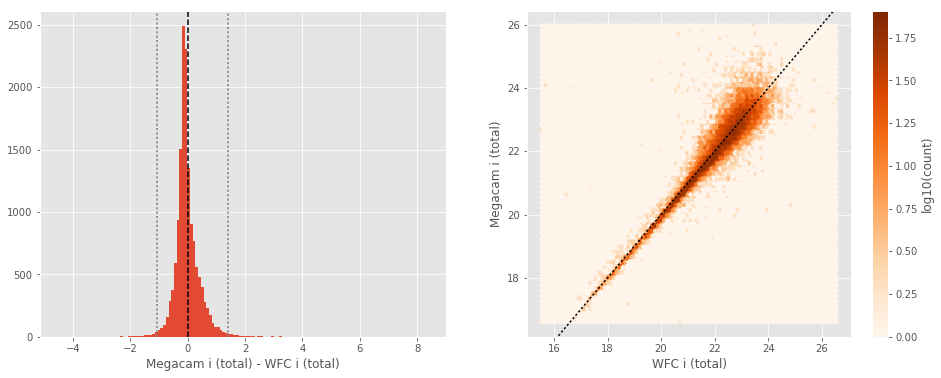

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.00
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7964646244049072
- 99% percentile: 0.9100483322143536


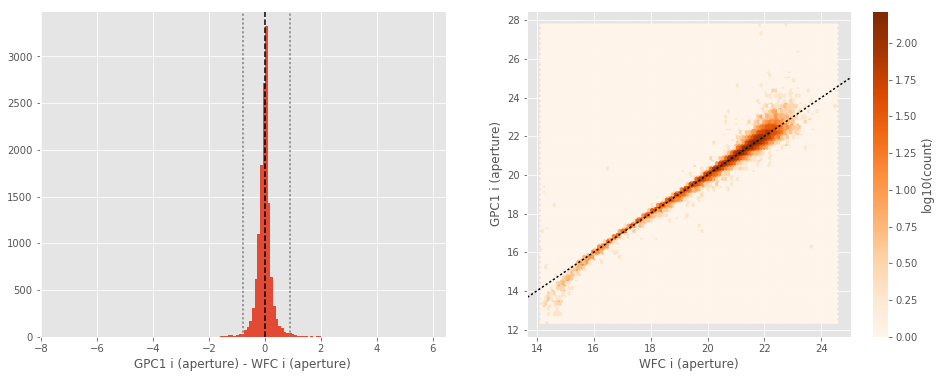

GPC1 i (total) - WFC i (total):
- Median: 0.07
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6286419677734375
- 99% percentile: 0.873689823150635


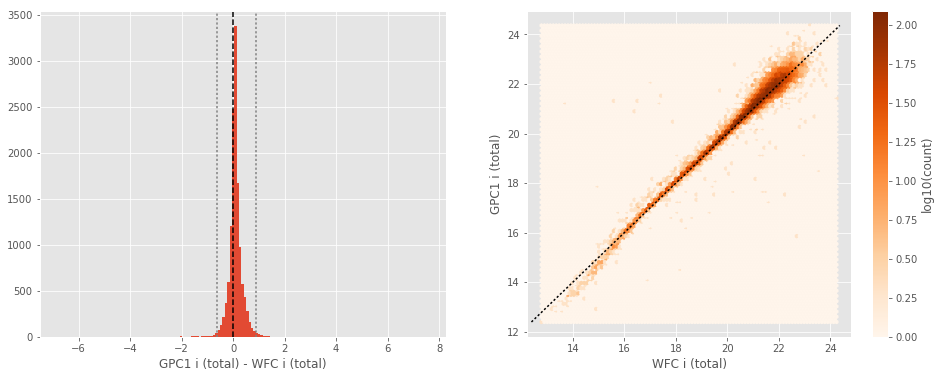

GPC1 i (total) - Megacam i (total):
- Median: 0.19
- Median Absolute Deviation: 0.09
- 1% percentile: -0.511842918395996
- 99% percentile: 0.8302346801757825


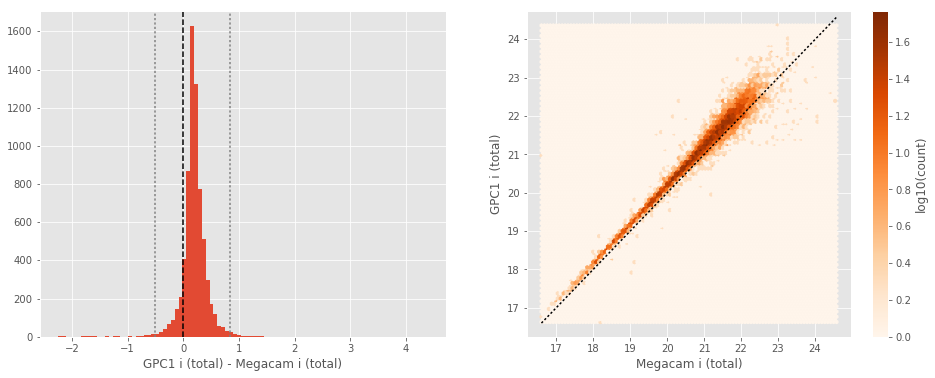

Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.15
- 1% percentile: -0.5779882431030274
- 99% percentile: 3.753044509887692


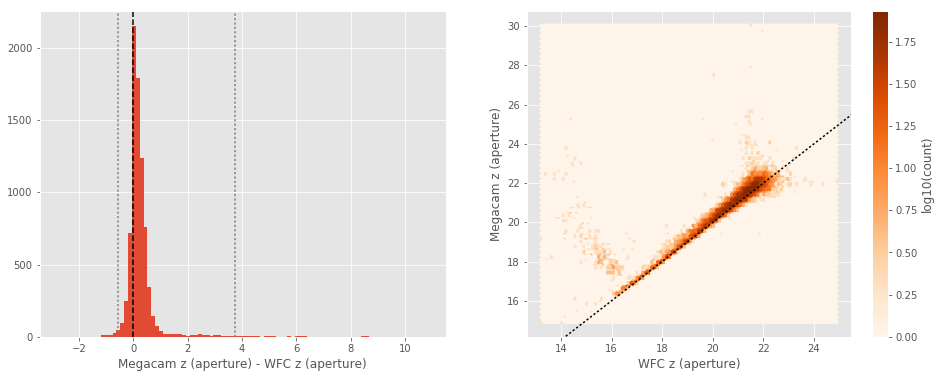

Megacam z (total) - WFC z (total):
- Median: -0.05
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9295276641845703
- 99% percentile: 2.490534820556639


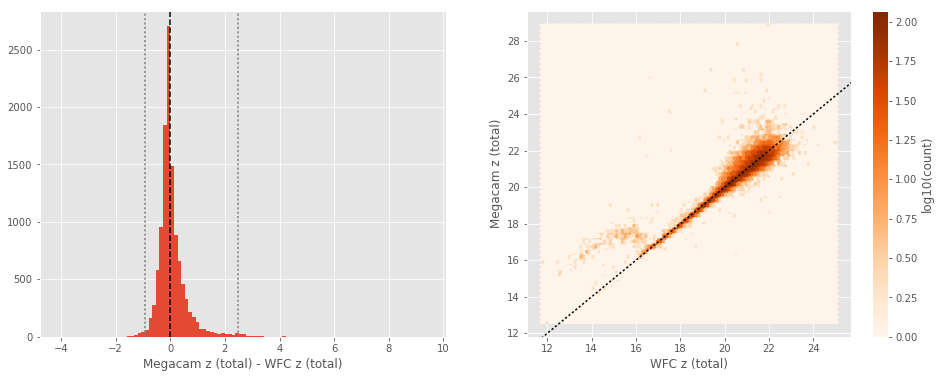

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7264391708374023
- 99% percentile: 1.0121294021606442


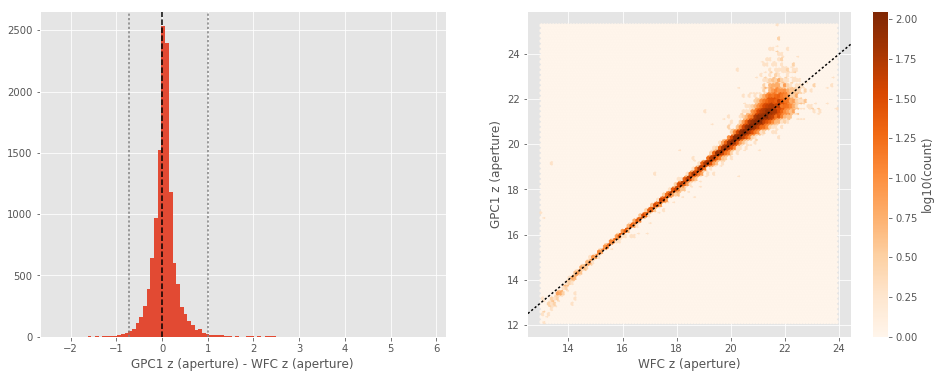

GPC1 z (total) - WFC z (total):
- Median: 0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -0.7497785949707031
- 99% percentile: 1.1819754409790049


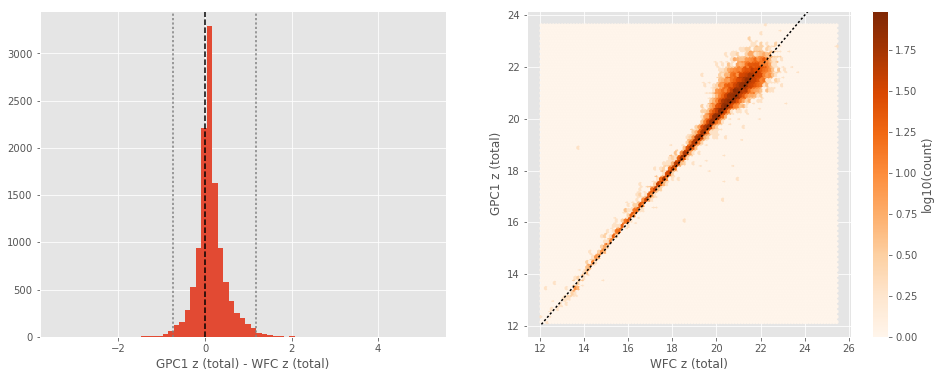

GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.17
- 1% percentile: -3.8294356346130374
- 99% percentile: 1.1702493476867666


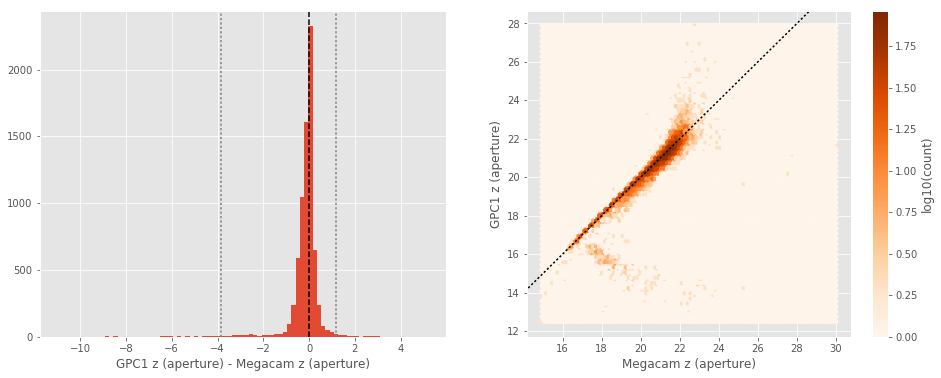

GPC1 z (total) - Megacam z (total):
- Median: 0.17
- Median Absolute Deviation: 0.10
- 1% percentile: -2.3335333156585696
- 99% percentile: 0.8888169288635253


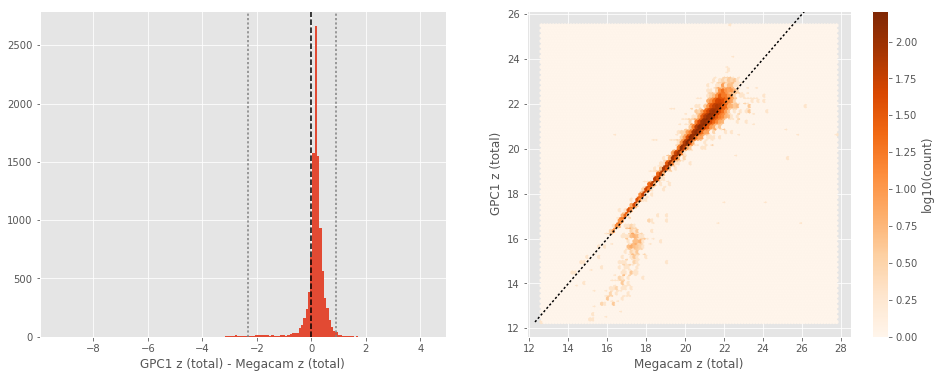

No sources have both Megacam y (total) and GPC1 y (total) values.


In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        # RCS has no aperture magnitudes
        if ('megacam_i' not in basecol1 
            and 'megacam_i' not in basecol2 
            and 'megacam_y' not in basecol1
            and'megacam_y' not in basecol1):
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                            labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS magnitudes.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_ELAIS-N2.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.19
- 1% percentile: -1.5080882835388185
- 99% percentile: 0.9397666168212868


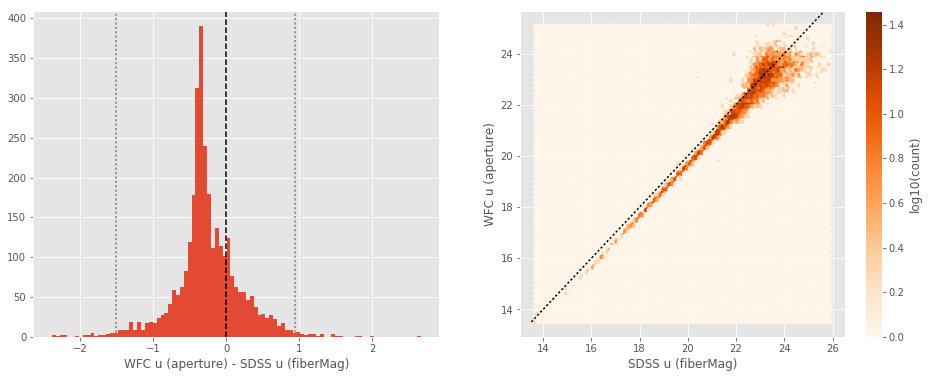

WFC u (total) - SDSS u (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.42
- 1% percentile: -3.633686351776123
- 99% percentile: 2.138343753814696


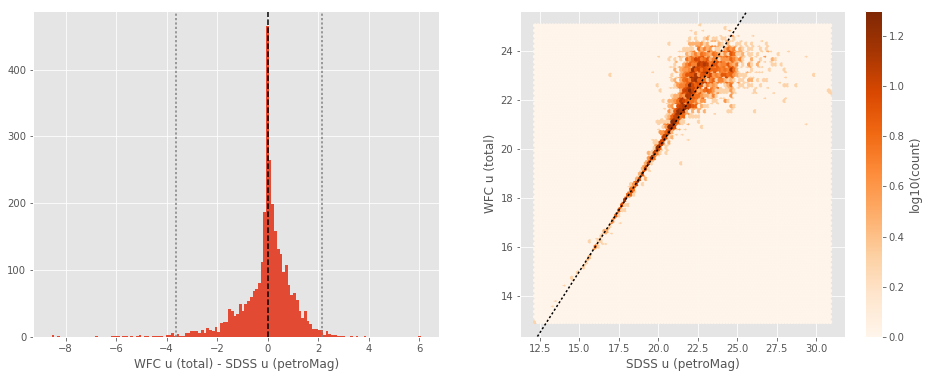

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.01
- Median Absolute Deviation: 0.57
- 1% percentile: -1.7301750183105469
- 99% percentile: 3.1626298904418806


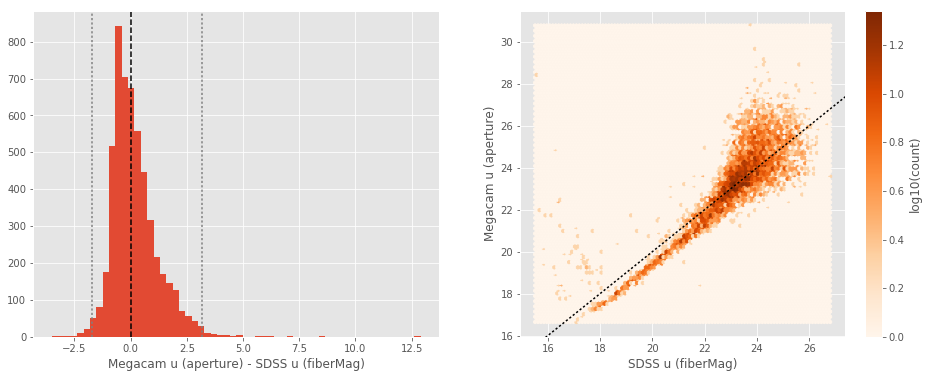

Megacam u (total) - SDSS u (petroMag):
- Median: 0.07
- Median Absolute Deviation: 0.76
- 1% percentile: -3.656492233276367
- 99% percentile: 4.988361511230468


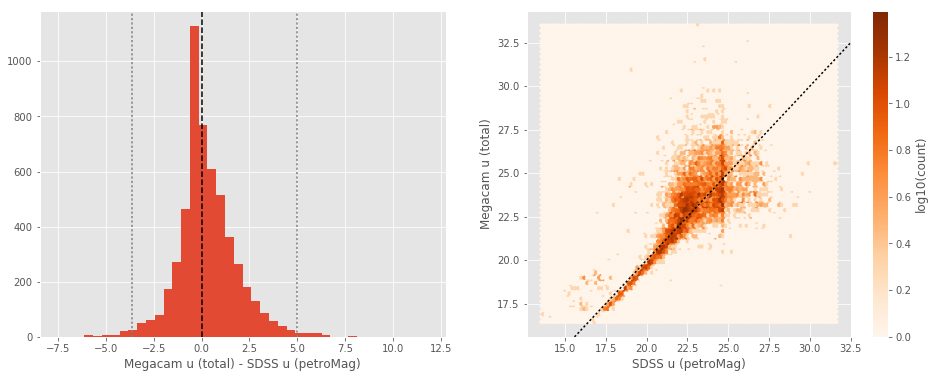

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2066106033325195
- 99% percentile: 0.6048369598388658


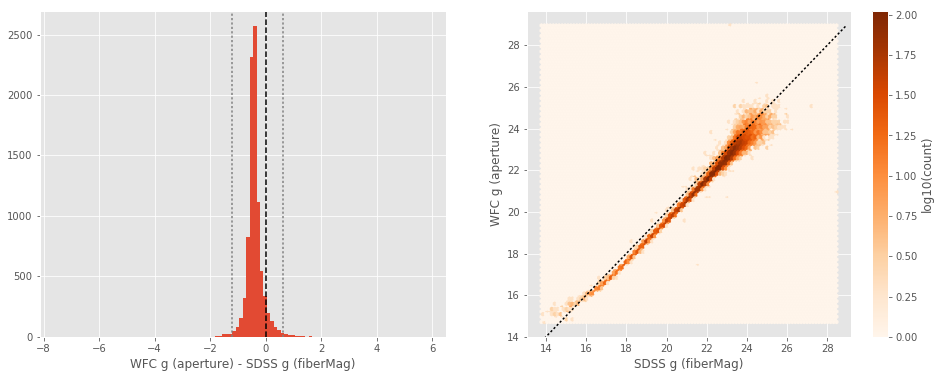

WFC g (total) - SDSS g (petroMag):
- Median: -0.10
- Median Absolute Deviation: 0.21
- 1% percentile: -3.20080265045166
- 99% percentile: 1.3628109359741216


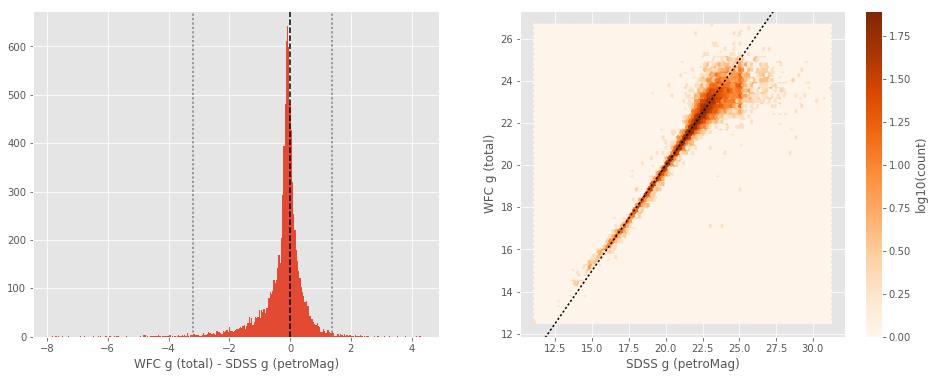

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2357501983642578
- 99% percentile: 3.724156723022442


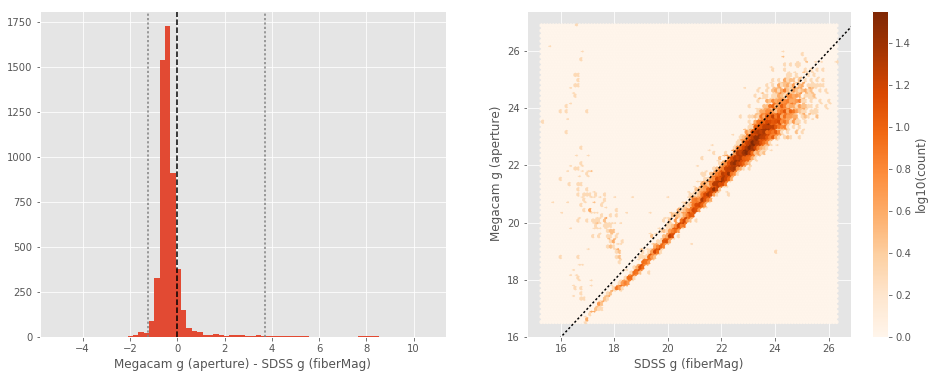

Megacam g (total) - SDSS g (petroMag):
- Median: -0.19
- Median Absolute Deviation: 0.23
- 1% percentile: -3.261693115234375
- 99% percentile: 2.8649573516845708


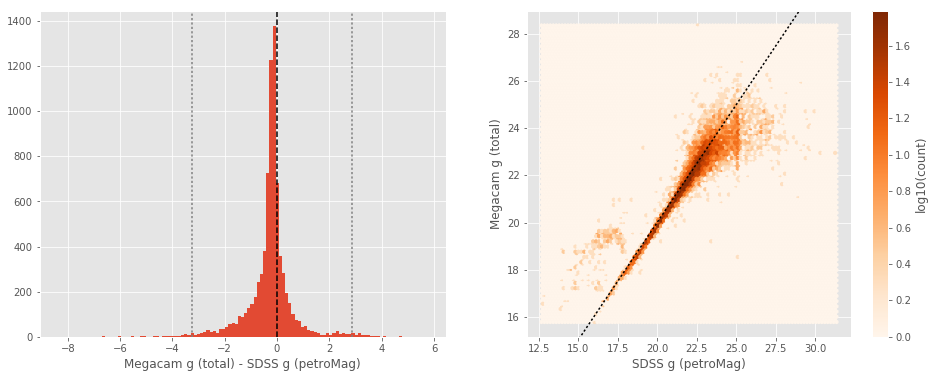

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.49
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7262804031372068
- 99% percentile: 1.7591300964355445


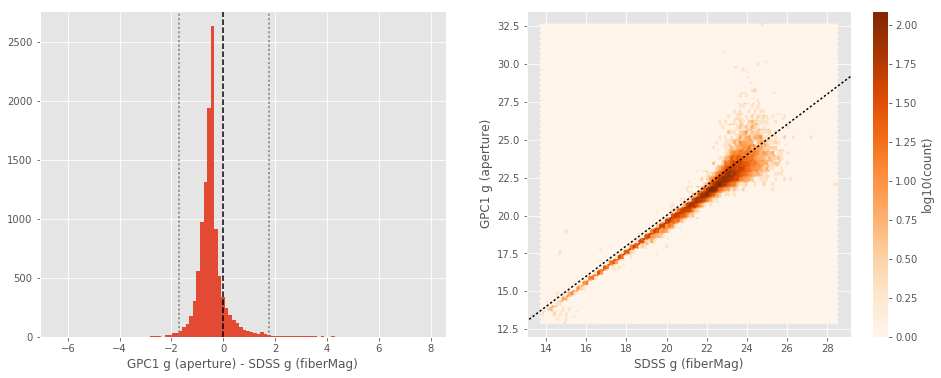

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -2.6873640060424804
- 99% percentile: 0.9888288497924823


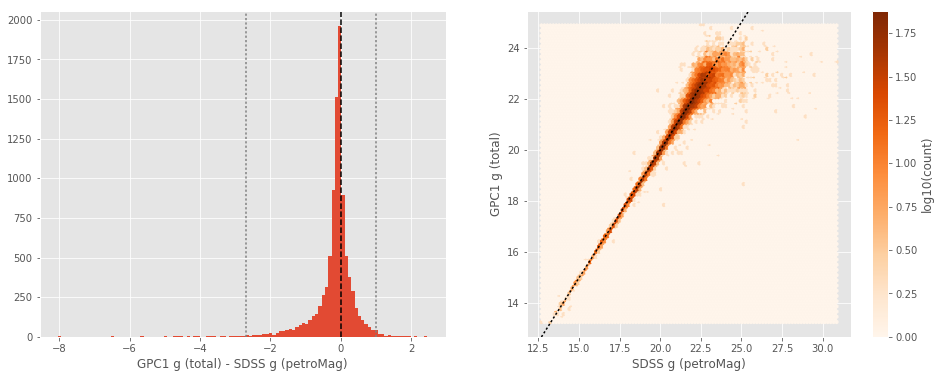

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8577423858642578
- 99% percentile: 0.3936159515380845


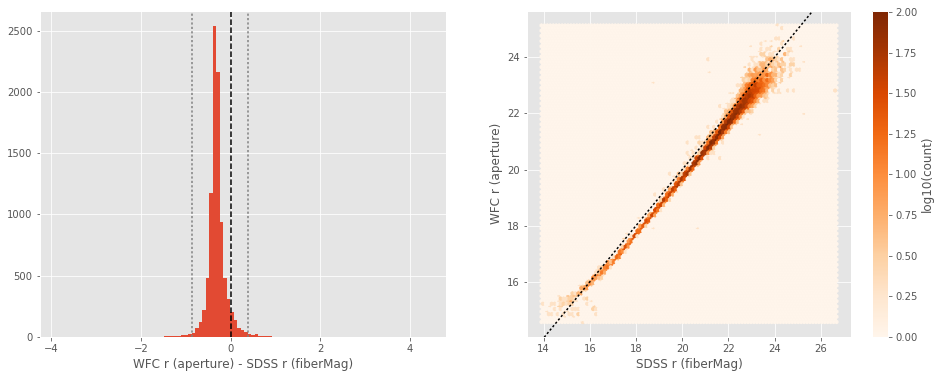

WFC r (total) - SDSS r (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.14
- 1% percentile: -2.46160831451416
- 99% percentile: 1.079500198364258


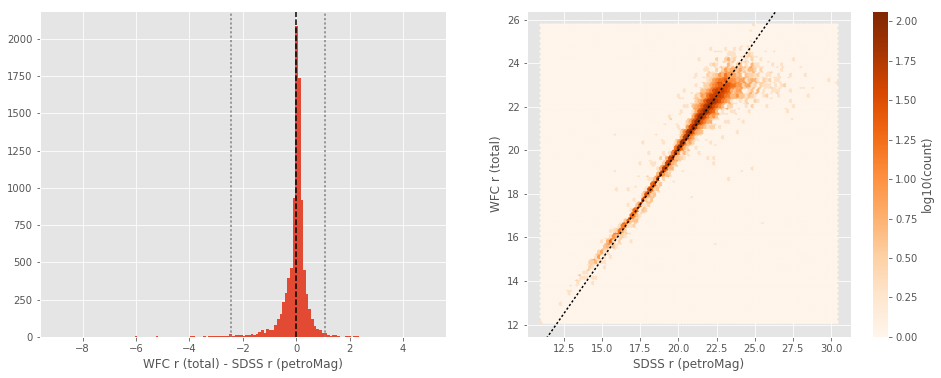

Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9398679733276367
- 99% percentile: 4.186496181488041


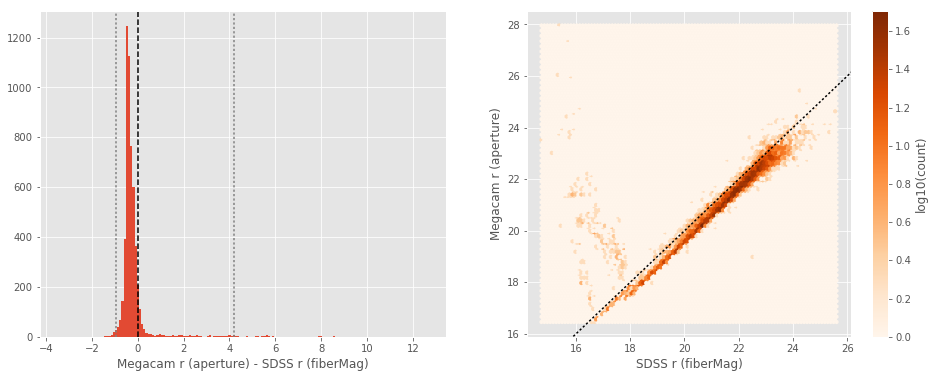

Megacam r (total) - SDSS r (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.13
- 1% percentile: -2.559123706817627
- 99% percentile: 2.8633115768432615


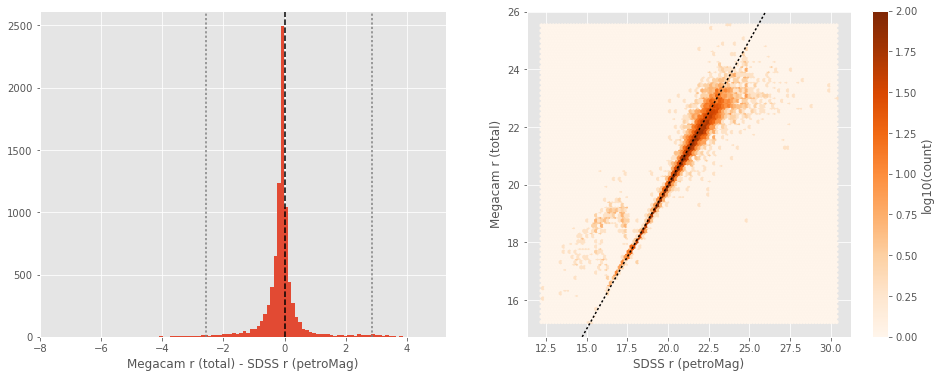

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.11
- 1% percentile: -1.198985233306885
- 99% percentile: 0.695460929870605


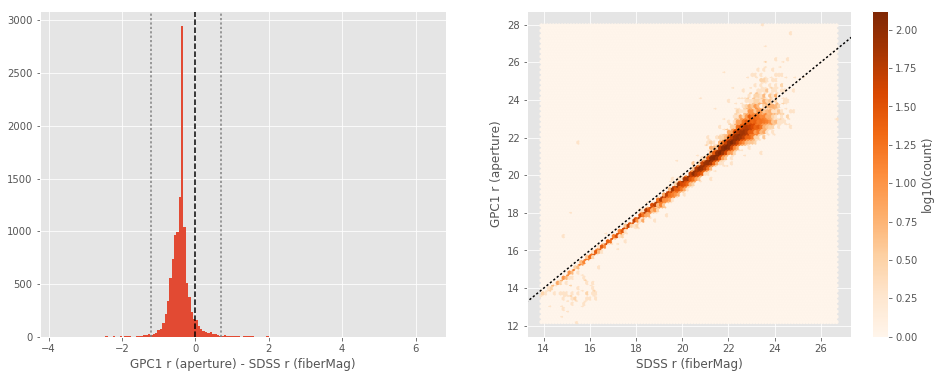

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.10
- 1% percentile: -1.940971450805664
- 99% percentile: 0.9089962005615214


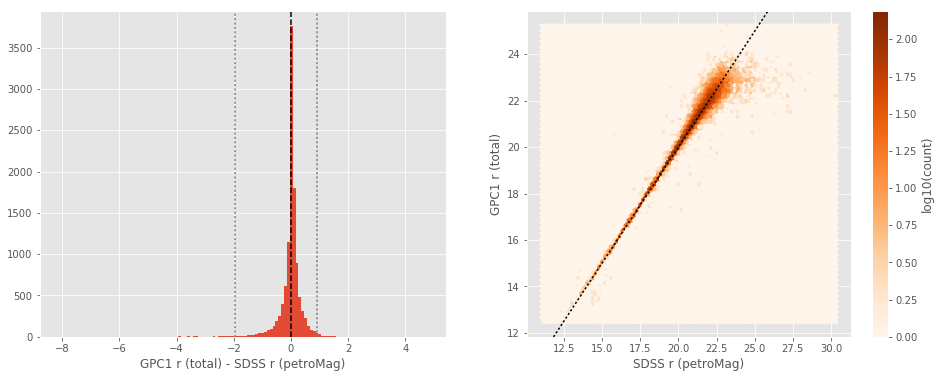

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9146337890625
- 99% percentile: 0.36798225402831897


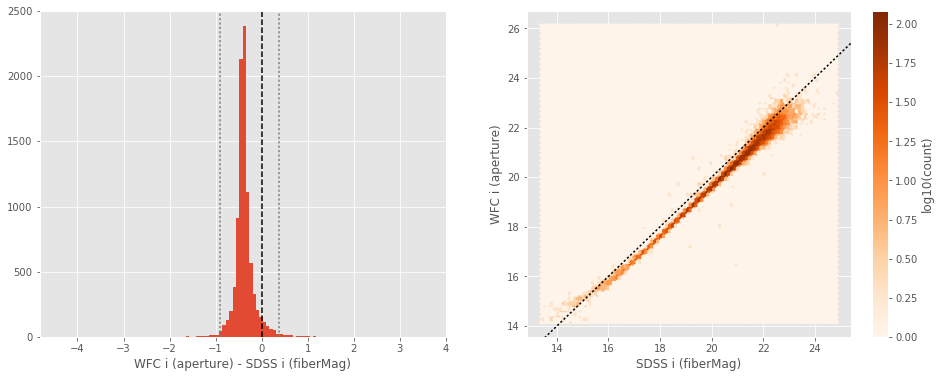

WFC i (total) - SDSS i (petroMag):
- Median: -0.04
- Median Absolute Deviation: 0.15
- 1% percentile: -3.7778721618652344
- 99% percentile: 0.9893630218505869


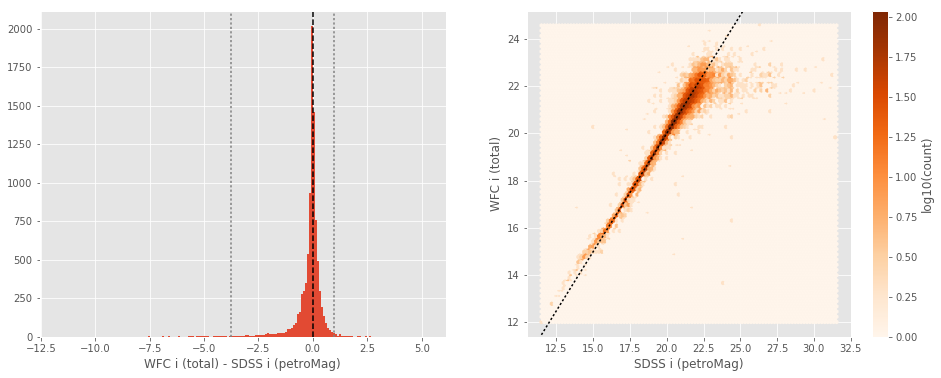

Megacam i (total) - SDSS i (petroMag):
- Median: -0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -3.9720952606201174
- 99% percentile: 0.8749613952636719


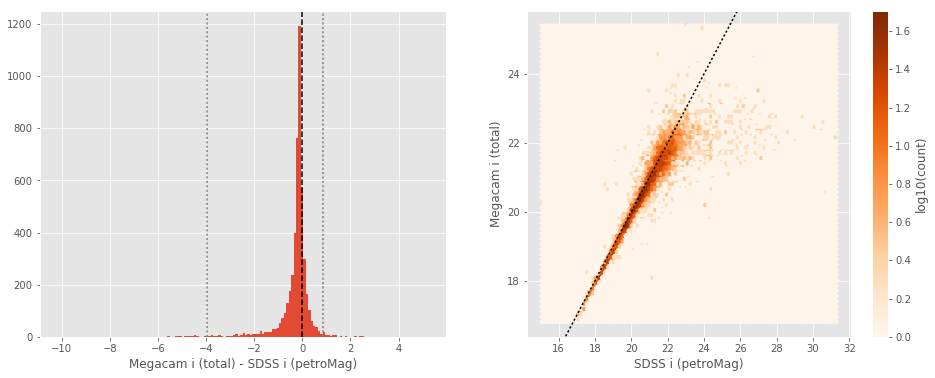

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9705064773559571
- 99% percentile: 0.406497764587403


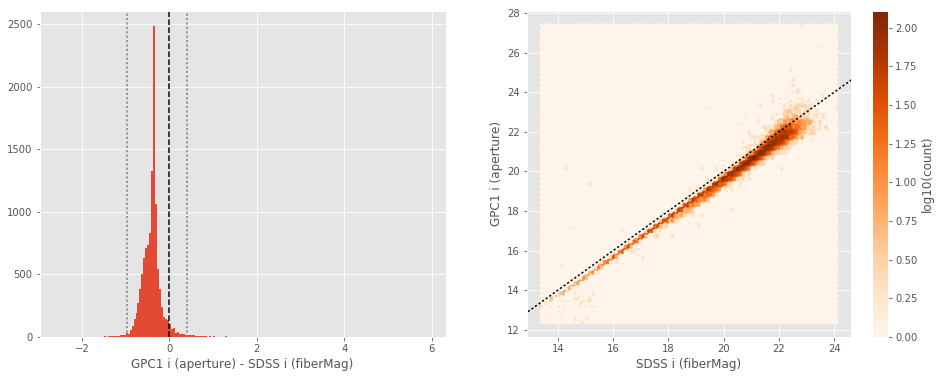

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.10
- 1% percentile: -2.6660083770751957
- 99% percentile: 0.9073825836181642


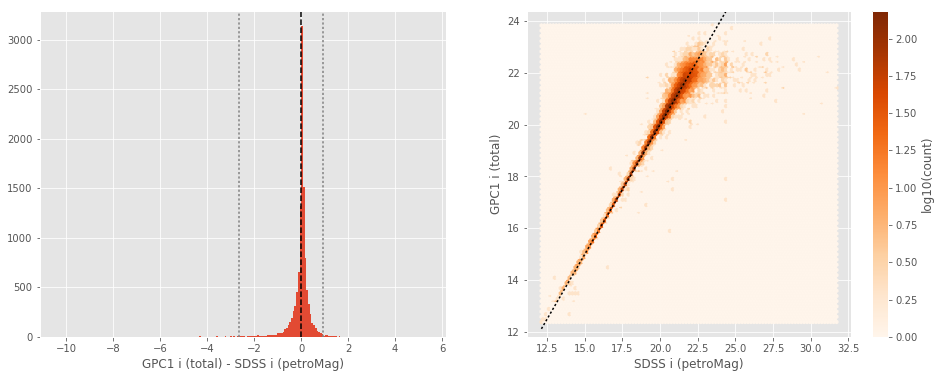

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.10
- 1% percentile: -1.0854340362548829
- 99% percentile: 0.6038125228881829


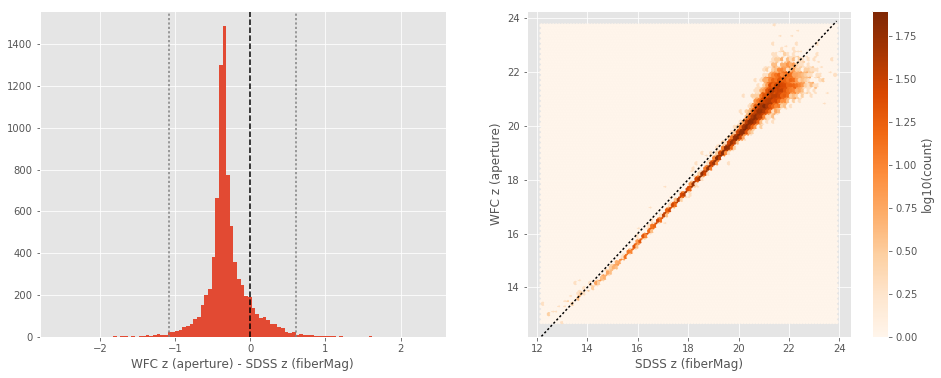

WFC z (total) - SDSS z (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.22
- 1% percentile: -2.864176425933838
- 99% percentile: 1.3921364021301303


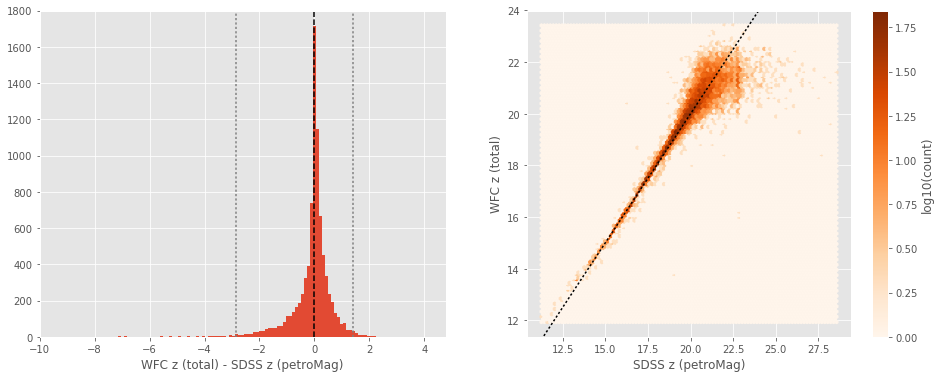

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9547021484375
- 99% percentile: 3.3593647384643663


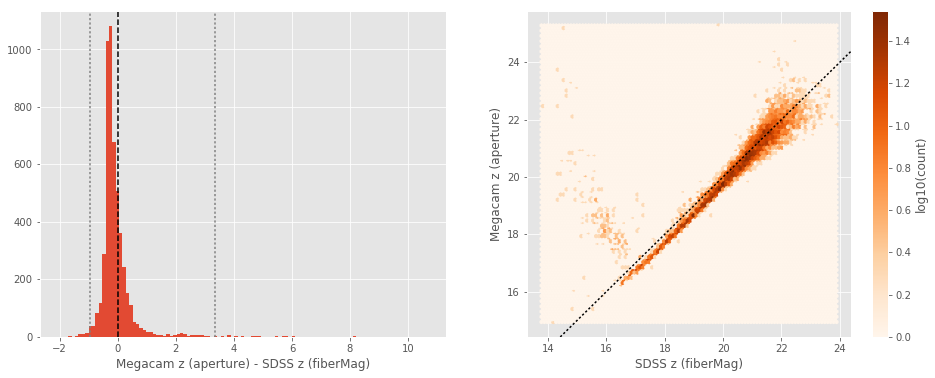

Megacam z (total) - SDSS z (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.27
- 1% percentile: -3.0905563545227053
- 99% percentile: 2.572762928009032


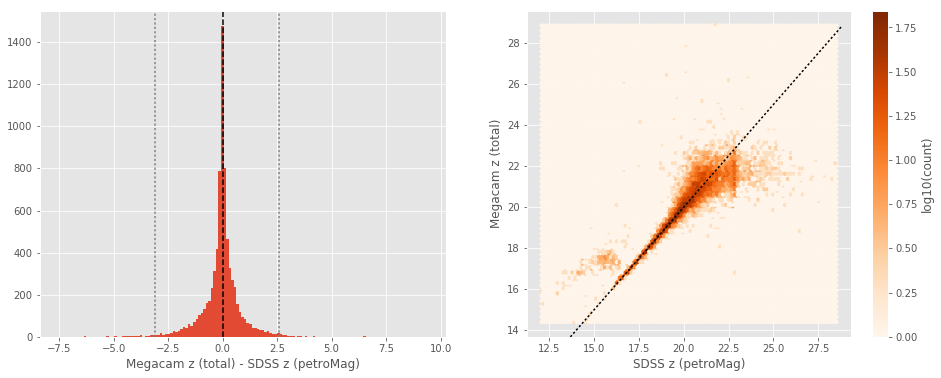

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0709292221069338
- 99% percentile: 0.9556843185424795


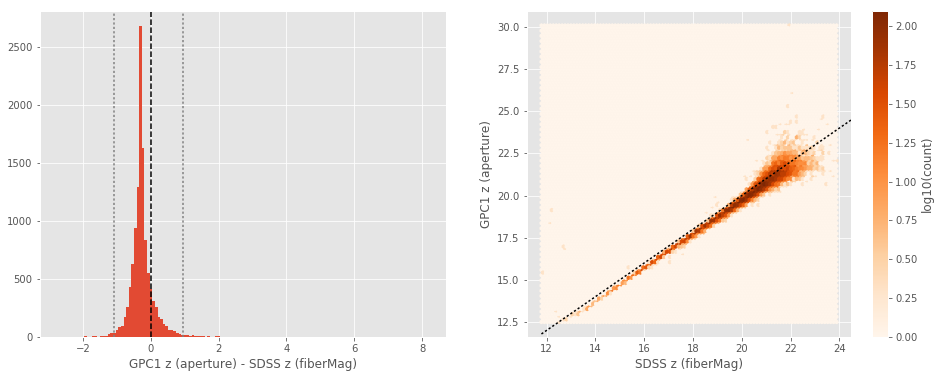

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.12
- Median Absolute Deviation: 0.20
- 1% percentile: -2.8183390426635744
- 99% percentile: 1.5490516662597626


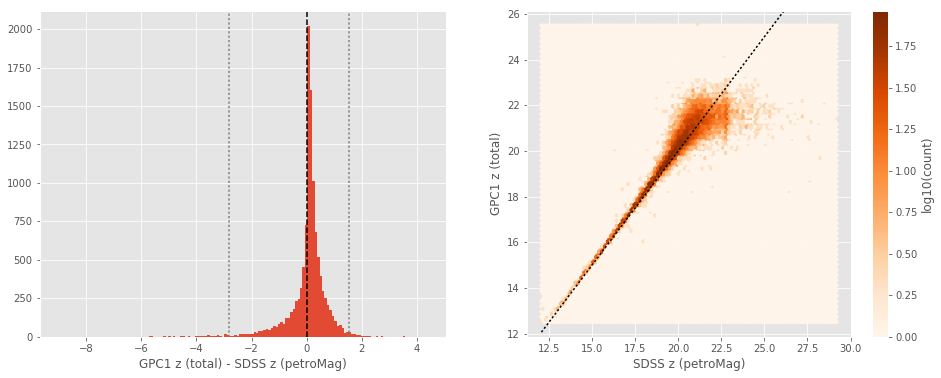

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
  
        if not 'megacam_i' in master_cat_mag_ap_colname:
            sdss_mag_ap = sdss[sdss_mag_ap_colname]
            master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
            nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                            labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [14]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 55212 / 138907 (39.75%)


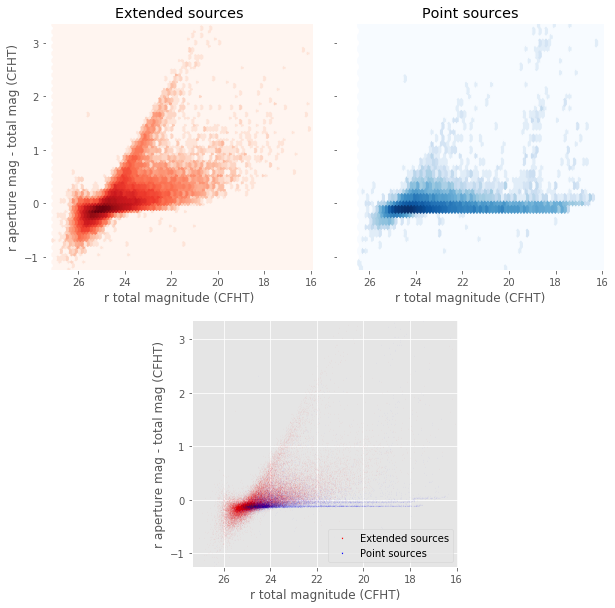

In [15]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 8154 / 138907 (5.87%)


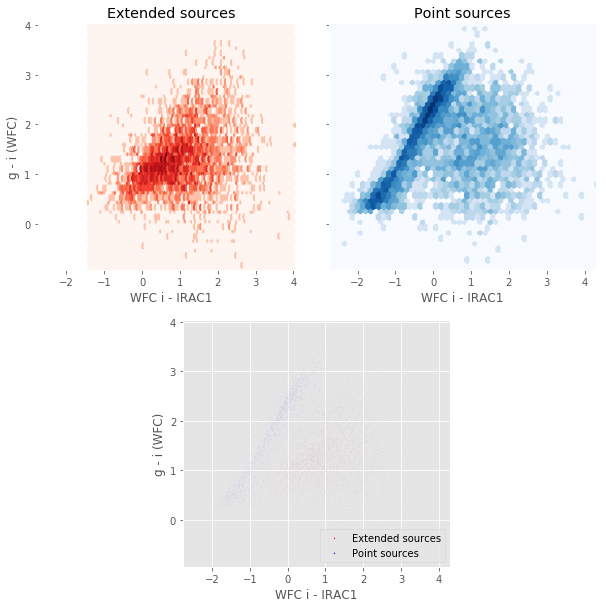

In [16]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 46512 / 138907 (33.48%)


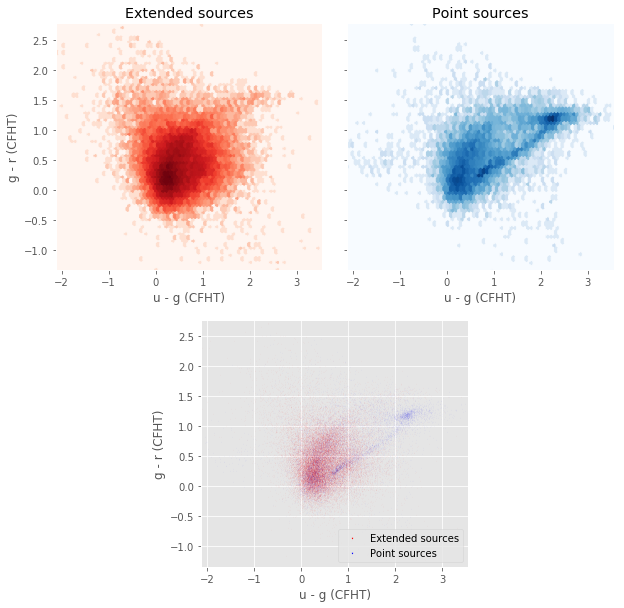

In [17]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 1639 / 138907 (1.18%)


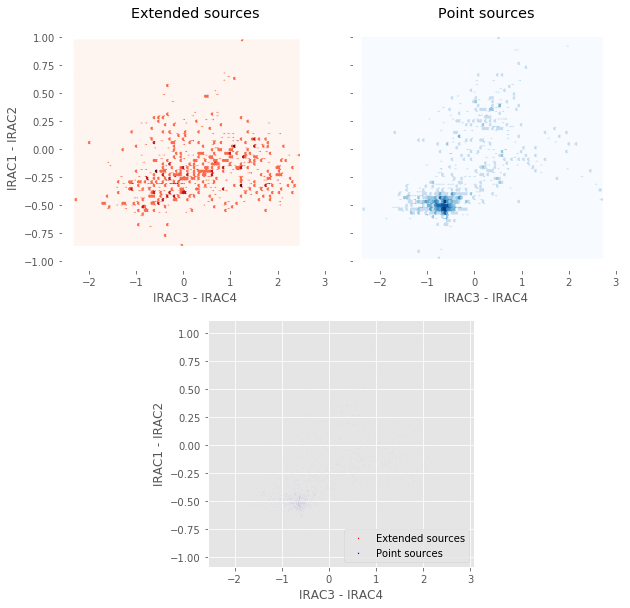

In [18]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)